In [1]:
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

from api.color_scheme import *

save_plot = False

In [2]:
res_files = [f for f in listdir('../results/') if isfile(join('../results/', f))]

In [92]:
print(','.join(col))

x_1,x_2,x_3,x_4,x_5,x_6


In [138]:
[i+'=0' for i in col]

['x_1=0', 'x_2=0', 'pred=0']

-1.255*sin(0.933*x_1 + 3.224) + 2.188*sin(1.052*x_2 - 0.177) + 0.508
2.126*sin(1.069*x_2 + 6.401) + 1.671*tanh(0.673*x_1 + 0.205) - 0.107
-2.123*sin(0.469*x_1 - 3.193) + 2.723*sin(0.808*x_2 - 6.208) + 0.26
-3.081*sqrt(1 - 0.604*x_1) - 2.277*sin(0.897*x_2 - 9.391) + 3.236
-1.074*sin(1.048*x_1 - 9.393) - 2.635*sin(0.794*x_2 + 2.993) + 0.624
-4.453*log(6.069 - 1.223*x_1) + 2.488*sin(0.86*x_2 + 0.008) + 8.297


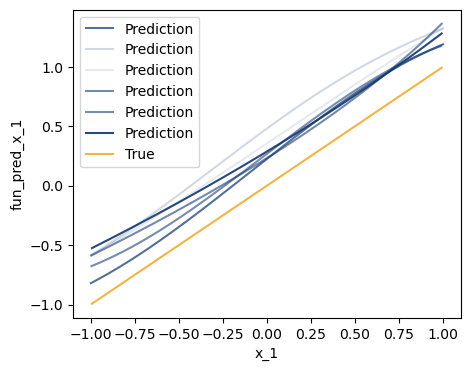

-1.255*sin(0.933*x_1 + 3.224) + 2.188*sin(1.052*x_2 - 0.177) + 0.508
2.126*sin(1.069*x_2 + 6.401) + 1.671*tanh(0.673*x_1 + 0.205) - 0.107
-2.123*sin(0.469*x_1 - 3.193) + 2.723*sin(0.808*x_2 - 6.208) + 0.26
-3.081*sqrt(1 - 0.604*x_1) - 2.277*sin(0.897*x_2 - 9.391) + 3.236
-1.074*sin(1.048*x_1 - 9.393) - 2.635*sin(0.794*x_2 + 2.993) + 0.624
-4.453*log(6.069 - 1.223*x_1) + 2.488*sin(0.86*x_2 + 0.008) + 8.297


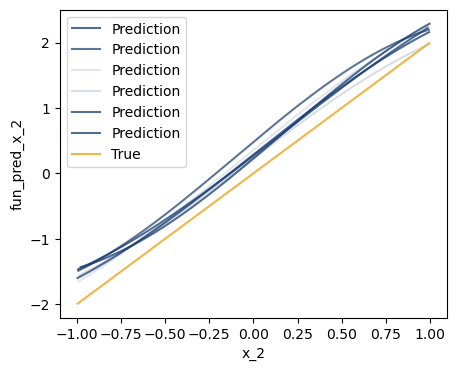

In [157]:
import random

df_summary = {}
data = 'linear'

df_temp = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, 0), index_col=[0])
col = []
for i in range(1, df_temp .shape[1]):
    col.append('x_{}'.format(i))
col.append('pred')

for var in col[:-1]:

    _ = plt.figure(figsize=(5,4))
    for i in res_files:
        if i.split('_')[1] != 'symbol' or i.split('_')[2] != data:
            continue
        
        seed = i.split('_')[-1].split('.')[0]
        
        res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
        
        try:
            df_pred = pd.read_csv('../results/pred_coxkan_{}_{}.csv'.format(data, seed), index_col=[0])
        except FileNotFoundError:
            continue
            
        print(res.iloc[-2][0])
        
        fun_str = res.iloc[-2][0]
        for v in col[:-1]:
            if v != var:
                fun_str = fun_str.replace(v, '0')
        
        eval(compile('''def fun({}):
            return {}
        '''.format(var, fun_str
                   .replace('sqrt', 'np.sqrt').replace('sin', 'np.sin')
                   .replace('log', 'np.log').replace('tanh', 'np.tanh')), '<string>', 'exec'))

        df_pred.columns = col
        
        fun_pred = []
        for i in df_pred.index:
            fun_pred.append(fun(df_pred.iloc[i][var]))
        
        df_pred['fun_pred_{}'.format(var)] = fun_pred
        
        if var == 'x_1':
            df_pred['fun_true_{}'.format(var)] = df_pred[var]
        else:
            df_pred['fun_true_{}'.format(var)] = df_pred[var] * 2
        
        sns.lineplot(data=df_pred, x=var, y='fun_pred_{}'.format(var), label='Prediction', color=AAAI_pal['Main Blue'], alpha=random.random())
        
        df_summary[seed] = df_pred
    
    sns.lineplot(data=df_pred, x=var, y='fun_true_{}'.format(var), label='True', color=AAAI_pal['Yellow'])
    plt.show()

In [102]:
for i in df_summary:
    print(i)

8
4
5
2
3
0


(-2.0, 2.0)

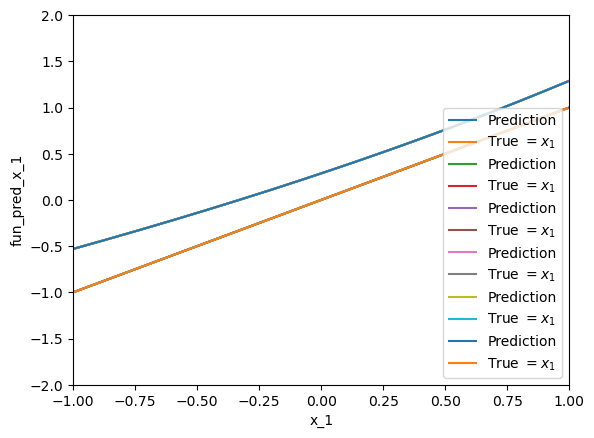

In [103]:
for seed in df_summary:
    df_pred = df_summary[seed]
    

    
    sns.lineplot(data=df_pred, x='x_1', y='fun_pred_x_1', label='Prediction')
    sns.lineplot(data=df_pred, x='x_1', y='fun_true_x_1', label='True $=x_1$')

plt.xlim([-1, 1])
plt.ylim([-2, 2])

In [98]:
df_summary['0']

,x_1,x_2,pred
0,-0.523684,-0.961568,-1.996363
1,0.823778,-0.318748,0.420931
2,0.529012,-0.668188,-0.566368
3,-0.169893,0.778753,1.676933
4,0.051089,0.720649,1.774097
...,...,...,...
395,0.610065,0.885446,2.581674
396,0.067034,0.658389,1.678728
397,0.039167,-0.294464,-0.301533
398,-0.303734,-0.092159,-0.174442


In [104]:
i = 'coxkan_symbol_linear_5.txt'
res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
res

,0,1
0,model,coxkan
1,data,linear
2,seed,5
3,"fixing (0,0,0) with sin, r2=0.9985109567642212",None
4,"fixing (0,1,0) with sin, r2=0.9975758194923401",None
5,-2.123*sin(0.469*x_1 - 3.193) + 2.723*sin(0.80...,None
6,-2.123118639*sin(0.468824029*x_1 - 3.192723989...,None


In [105]:
res.iloc[-2][0]

'-2.123*sin(0.469*x_1 - 3.193) + 2.723*sin(0.808*x_2 - 6.208) + 0.26'

In [106]:
eval(compile('''def fun(x_1, x_2):
    return {}
'''.format(res.iloc[-1][0]
           .replace('sqrt', 'np.sqrt')
           .replace('sin', 'np.sin')
           ), '<string>', 'exec'))
fun(x_1=1, x_2=2)

3.8242146096150664

In [107]:
df_pred = pd.read_csv('../results/pred_coxkan_linear_0.csv', index_col=[0])

col = []
for i in range(1, df_pred.shape[1]):
    col.append('x_{}'.format(i))
col.append('pred')

df_pred.columns = col
df_pred

,x_1,x_2,pred
0,-0.523684,-0.961568,-1.996363
1,0.823778,-0.318748,0.420931
2,0.529012,-0.668188,-0.566368
3,-0.169893,0.778753,1.676933
4,0.051089,0.720649,1.774097
...,...,...,...
395,0.610065,0.885446,2.581674
396,0.067034,0.658389,1.678728
397,0.039167,-0.294464,-0.301533
398,-0.303734,-0.092159,-0.174442


(-2.0, 2.0)

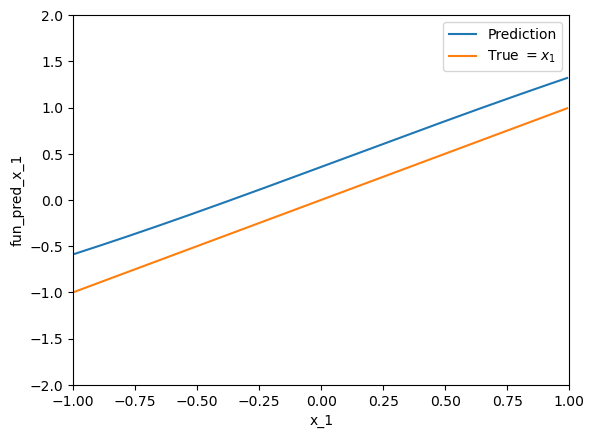

In [108]:
fun_pred = []
for i in df_pred.index:
    fun_pred.append(fun(x_1=df_pred.iloc[i]['x_1'], x_2=0))
    
df_pred['fun_pred_x_1'] = fun_pred
df_pred['fun_true_x_1'] = df_pred['x_1']

sns.lineplot(data=df_pred, x='x_1', y='fun_pred_x_1', label='Prediction')
sns.lineplot(data=df_pred, x='x_1', y='fun_true_x_1', label='True $=x_1$')
plt.xlim([-1, 1])
plt.ylim([-2, 2])

(-2.0, 2.0)

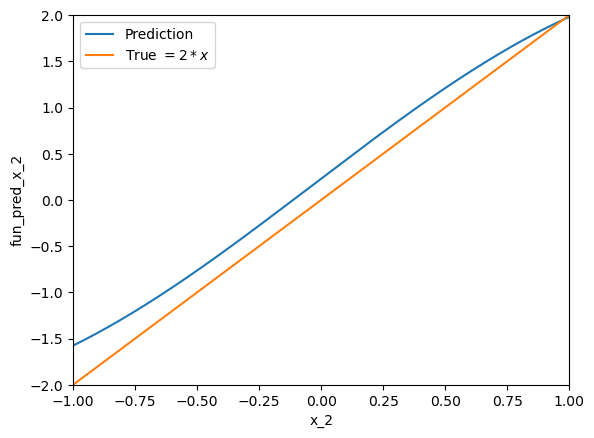

In [80]:
fun_pred = []
for i in df_pred.index:
    fun_pred.append(fun(x_1=0, x_2=df_pred.iloc[i]['x_2']))
    
df_pred['fun_pred_x_2'] = fun_pred
df_pred['fun_true_x_2'] = df_pred['x_2'] * 2

sns.lineplot(data=df_pred, x='x_2', y='fun_pred_x_2', label='Prediction')
sns.lineplot(data=df_pred, x='x_2', y='fun_true_x_2', label='True $=2*x$')
plt.xlim([-1, 1])
plt.ylim([-2, 2])